In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
import matplotlib.pyplot as plt

In [8]:
some_digit = X.values[0]
some_digit_image = some_digit.reshape(28,28)

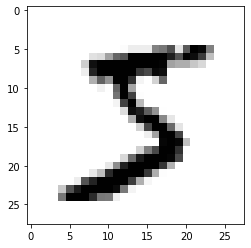

In [9]:
plt.imshow(some_digit_image, cmap='binary')

In [10]:
y[0]

'5'

**Since the label is of string datatype, let's convert it into the integer datatype since most of the ML algorithms expect the lable to be in integer form**

In [11]:
import numpy as np
y = y.astype(np.uint8)

In [12]:
## splitting the data into the train and test
## since the data is already shuffled for us, we won't use the scikit-learn's train_test_split class
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
## converting the problem from mulit-class to the binary one 
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

### Training the model

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=234)

In [17]:
from sklearn.model_selection import cross_val_predict

### Finding the predictions

In [18]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

### Finding the confusion_matrix

In [19]:
## finding the confusion matrix for the predictions
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53113,  1466],
       [ 1541,  3880]], dtype=int64)

### Finding the precision and recall score

In [20]:
## finding the precision and recall score for the predictions

from sklearn.metrics import precision_score, recall_score

print(f"Precision Score: {precision_score(y_train_5, y_train_pred)}")
print(f"Recall Score: {recall_score(y_train_5, y_train_pred)}")

Precision Score: 0.7257762813318369
Recall Score: 0.7157351042243129


### Finding the f1 score

In [21]:
## finding the f1 score for the predictions

from sklearn.metrics import f1_score

print(f"f1 score: {f1_score(y_train_5, y_train_pred)}")

f1 score: 0.7207207207207207


### Finding the scores for the instances using the decision function

In [22]:
## plotting the precision-recall curve

y_score = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_score

array([  8855.68772341, -13696.50008929, -22045.21948114, ...,
         7649.78272151, -18055.12058863, -15312.10655183])

### Finding the precision, recall and thresholds using the scores obtained earlier

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_score)

In [50]:
precisions.shape

(59970,)

In [45]:
recalls.shape

(59970,)

In [46]:
thresholds.shape

(59969,)

**Here we can see that we got one extra value for threshold than for precision and recall and hence while plotting the graphs, we will skip the last value in the precisions and recalls**

### Creating the function to plot precision and recall VS thresholds

In [58]:
import seaborn as sns
def plot_precision_recall_VS_threshold(precisions, recalls, thresholds):
    
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,7))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.legend(loc='best')
    plt.xlabel('Threshold')
    plt.ylabel('Precision and Recall')
    plt.title('Precision and Recall VS Threshold')

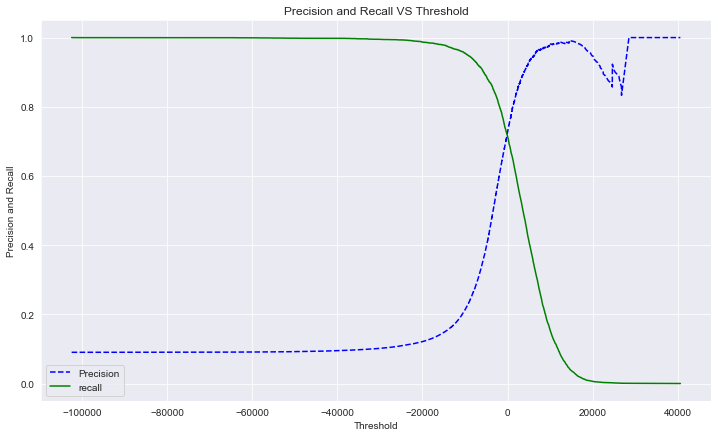

In [59]:
plot_precision_recall_VS_threshold(precisions, recalls, thresholds)

### Finding the threshold at which the precision value is at least 80

In [60]:
## here we can find the threshold that suits our requirement
## let's say we have a requirement of a model having 80% precision then we can select the corresponding threshold
## let's find the threshold that fulfills this requirement
threshold_80 = thresholds[np.argmax(thresholds>=0.8)]
threshold_80

1.424737627850675

In [63]:
## using the precision_80 t0 classify 
y_train_pred_80 = (y_score >= threshold_80)

In [84]:
y_train_pred_80

array([ True, False, False, ...,  True, False, False])

### Plotting precision VS recall

Text(0.5, 1.0, 'Precision VS Recall')

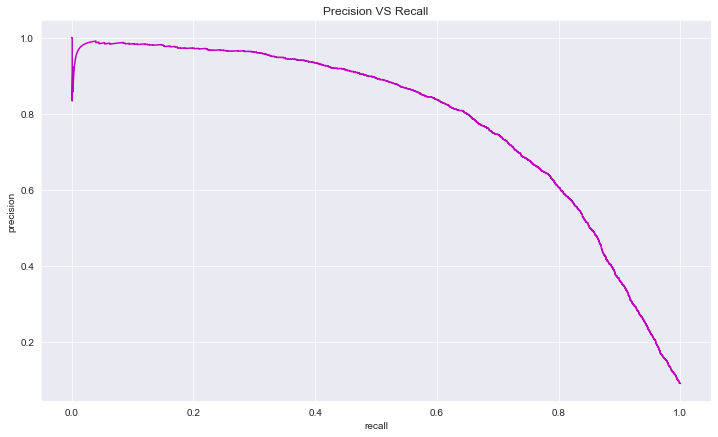

In [64]:
plt.figure(figsize=(12,7))
plt.plot(recalls, precisions, 'm-')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision VS Recall')

### Plotting ROC curve

In [66]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_score)

In [71]:
def plot_roc(fpr, tpr, label=None):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,6))
    plt.plot(fpr,tpr, 'm',linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve')

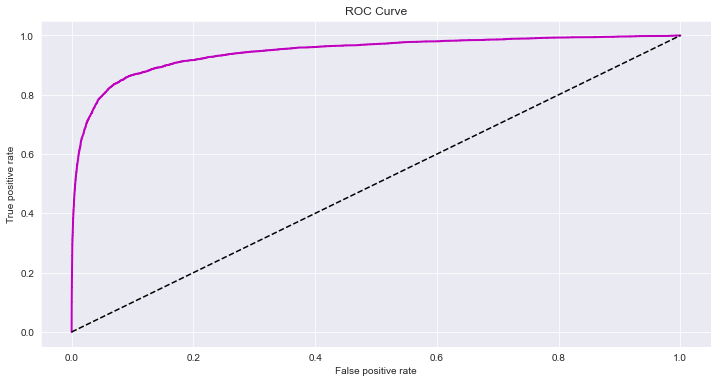

In [72]:
plot_roc(fpr, tpr, label='ROC Curve')

### finding the area under the ROC curve

In [74]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_score)

0.9441680671926949

**Not every model has a decision_function method, instead of this we can also use predict_proba method.**

In [75]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=234)

In [76]:
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [77]:
y_proba_forest

array([[0.18, 0.82],
       [0.96, 0.04],
       [0.99, 0.01],
       ...,
       [0.02, 0.98],
       [0.94, 0.06],
       [0.92, 0.08]])

In [78]:
## getting the probabilities of the positive class
y_scores_proba = y_proba_forest[:,1]

In [79]:
y_scores_proba

array([0.82, 0.04, 0.01, ..., 0.98, 0.06, 0.08])

In [80]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_proba)

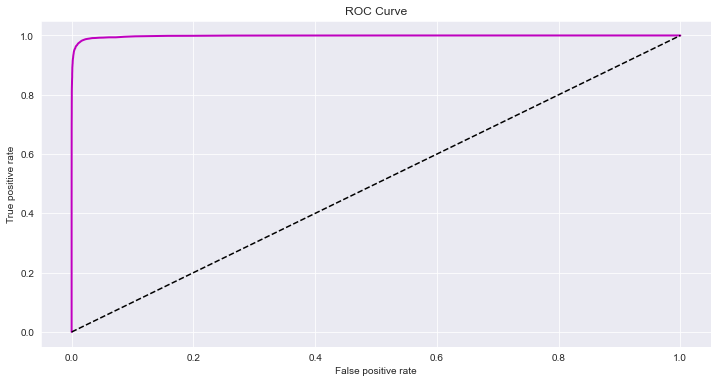

In [81]:
plot_roc(fpr_forest, tpr_forest, label='ROC Curve')

In [83]:
roc_auc_score(y_train_5, y_scores_proba)

0.9983047509960186